In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

In this notebook, we finish the clustering, begun in "more_models_withclustering.ipynb", on West Philly. The restaurants there of price levels 0, 2, and 3 are left to consider.

In [2]:
#access the remaining problematic data
df = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/train_data_with_census.csv")

df = df[df.range != '1']

In [3]:
df

,name,site,subtypes,category,type,phone,full_address,borough,street,postal_code,...,description,booking_appointment_link,location_link,location_reviews_link,place_id,google_id,cid,kgmid,reviews_id,census_tract
0,The Legends of Seafood and Soul Food,True,"Seafood restaurant, Soul food restaurant",restaurants,Seafood restaurant,True,"5352 Woodland Ave, Philadelphia, PA 19143",Kingsessing,5352 Woodland Ave,19143.0,...,NaN,True,https://www.google.com/maps/place/The+Legends+...,https://www.google.com/maps/place/The+Legends+...,ChIJq6r_qpDGxokR82FYgNmWN_0,0x89c6c690aaffaaab:0xfd3796d9805861f3,18246218276220199411,/g/11h5q8014f,-200525797489352205,7000
1,Fette Sau,True,"Restaurant, American restaurant, Barbecue rest...",restaurants,Restaurant,True,"1208 Frankford Ave, Philadelphia, PA 19125",Fishtown,1208 Frankford Ave,19125.0,...,"Dry-rubbed meat smoked in-house, beer & whiske...",True,https://www.google.com/maps/place/Fette+Sau/@3...,https://www.google.com/maps/place/Fette+Sau/@3...,ChIJjQevdGnIxokRp1yuuconz7U,0x89c6c86974af078d:0xb5cf27cab9ae5ca7,13100733592696151207,/g/11r9wbr7d,-5346010481013400409,14400
2,Cafe Liz,False,"Portuguese restaurant, Bar",restaurants,Portuguese restaurant,True,"5437 N Lawrence St, Philadelphia, PA 19120",Olney-Oak Lane,5437 N Lawrence St,19120.0,...,Traditional restaurant offering Portuguese cui...,False,https://www.google.com/maps/place/Cafe+Liz/@40...,https://www.google.com/maps/place/Cafe+Liz/@40...,ChIJPdBeE6C3xokRAr7ruQTphsw,0x89c6b7a0135ed03d:0xcc86e904b9ebbe02,14737723037124902402,/g/1ygvstd8l,-3709021036584649214,27401
4,Little Fish BYOB,True,Seafood restaurant,restaurants,Seafood restaurant,True,"746 S 6th St, Philadelphia, PA 19147",Bella Vista,746 S 6th St,19147.0,...,Quaint spot with a handful of tables offering ...,True,https://www.google.com/maps/place/Little+Fish+...,https://www.google.com/maps/place/Little+Fish+...,ChIJwTNAtJ_IxokRRk7dk_j0DR8,0x89c6c89fb44033c1:0x1f0df4f893dd4e46,2237713938342825542,/g/1tm0cs2w,2237713938342825542,1800
5,Chili's Grill & Bar,True,"Restaurant, American restaurant, Bar, Bar & gr...",restaurants,Restaurant,True,"1239 Filbert St, Philadelphia, PA 19107",Center City East,1239 Filbert St,19107.0,...,Family-friendly chain serving classic Tex-Mex ...,True,https://www.google.com/maps/place/Chili%27s+Gr...,https://www.google.com/maps/place/Chili%27s+Gr...,ChIJ7ZM9sC7GxokRyiuGZ2BzXCs,0x89c6c62eb03d93ed:0x2b5c736067862bca,3124499099379182538,/g/1tf66fdd,3124499099379182538,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Cilantro Mediterranean Cuisine,False,"Middle Eastern restaurant, Halal restaurant, M...",restaurants,Middle Eastern restaurant,True,"613 S 4th St, Philadelphia, PA 19147",Southwark,613 S 4th St,19147.0,...,Casual Mediterranean restaurant serving hearty...,False,https://www.google.com/maps/place/Cilantro+Med...,https://www.google.com/maps/place/Cilantro+Med...,ChIJD1RTRAnJxokRQ7nFZza6Acw,0x89c6c9094453540f:0xcc01ba3667c5b943,14700235401546021187,/g/11h4kxnrmc,-3746508672163530429,1600
2447,Sabrina's Cafe,True,"Restaurant, Breakfast restaurant, Brunch resta...",restaurants,Restaurant,True,"1804 Callowhill St, Philadelphia, PA 19130",Center City,1804 Callowhill St,19130.0,...,Relaxed New American cafe with a devoted follo...,True,https://www.google.com/maps/place/Sabrina%27s+...,https://www.google.com/maps/place/Sabrina%27s+...,ChIJxV6oLs3HxokRAzDNE-V7_pQ,0x89c6c7cd2ea85ec5:0x94fe7be513cd3003,10736154785507782659,/g/1v3dt27t,-7710589288201768957,12502
2448,Dagwood's Pub,True,Bar & grill,restaurants,Bar & grill,True,"4625 Linden Ave, Philadelphia, PA 19114",Northeast Philadelphia,4625 Linden Ave,19114.0,...,"This unpretentious, family-owned standby offer...",True,https://www.google.com/maps/place/Dagwood%27s+...,https://www.google.com/maps/place/Dagwood%27s+...,ChIJ153-_5q0xokRQV19l09PRu0,0x89c6b49afffe9dd7:0xed464f4f977d5d41,17097440238621252929,/g/1tjbt3h2,-1349303835088298687,35200
2449,Malooga,True,"M

In [4]:
!pip install ipynb

In [4]:
#add on census data
census_data = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/census_data.csv")

from ipynb.fs.defs.census_and_restaurant_data_withEDA import adjoin_census

df = adjoin_census(df, census_data)

In [5]:
df

,name,site,subtypes,category,type,phone,full_address,borough,street,postal_code,...,% White,% Black,% Asian,% Hispanic/Latino,Foreign Born Immigrant %,Median Age,Neighborhood Turnover %,state,county,tract
0,The Legends of Seafood and Soul Food,True,"Seafood restaurant, Soul food restaurant",restaurants,Seafood restaurant,True,"5352 Woodland Ave, Philadelphia, PA 19143",Kingsessing,5352 Woodland Ave,19143.0,...,0.008011,0.952486,0.000000,0.024862,0.107459,36.3,0.000000,42,101,7000
1,Fette Sau,True,"Restaurant, American restaurant, Barbecue rest...",restaurants,Restaurant,True,"1208 Frankford Ave, Philadelphia, PA 19125",Fishtown,1208 Frankford Ave,19125.0,...,0.651473,0.096267,0.068566,0.246955,0.109430,31.5,0.003249,42,101,14400
2,Cafe Liz,False,"Portuguese restaurant, Bar",restaurants,Portuguese restaurant,True,"5437 N Lawrence St, Philadelphia, PA 19120",Olney-Oak Lane,5437 N Lawrence St,19120.0,...,0.051712,0.571741,0.250910,0.153314,0.322651,46.9,0.000000,42,101,27401
3,Little Fish BYOB,True,Seafood restaurant,restaurants,Seafood restaurant,True,"746 S 6th St, Philadelphia, PA 19147",Bella Vista,746 S 6th St,19147.0,...,0.758715,0.148530,0.049409,0.013640,0.064262,34.9,0.002475,42,101,1800
4,Chili's Grill & Bar,True,"Restaurant, American restaurant, Bar, Bar & gr...",restaurants,Restaurant,True,"1239 Filbert St, Philadelphia, PA 19107",Center City East,1239 Filbert St,19107.0,...,0.431643,0.323816,0.142761,0.120927,0.186093,35.2,0.006382,42,101,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,Cilantro Mediterranean Cuisine,False,"Middle Eastern restaurant, Halal restaurant, M...",restaurants,Middle Eastern restaurant,True,"613 S 4th St, Philadelphia, PA 19147",Southwark,613 S 4th St,19147.0,...,0.871009,0.051937,0.048106,0.036186,0.051511,33.4,0.000000,42,101,1600
1425,Sabrina's Cafe,True,"Restaurant, Breakfast restaurant, Brunch resta...",restaurants,Restaurant,True,"1804 Callowhill St, Philadelphia, PA 19130",Center City,1804 Callowhill St,19130.0,...,0.681634,0.081147,0.194482,0.067081,0.247227,32.7,0.021573,42,101,12502
1426,Dagwood's Pub,True,Bar & grill,restaurants,Bar & grill,True,"4625 Linden Ave, Philadelphia, PA 19114",Northeast Philadelphia,4625 Linden Ave,19114.0,...,0.881232,0.042764,0.052898,0.054722,0.067694,48.3,0.000000,42,101,35200
1427,Malooga,True,"Middle Eastern restaurant, Falafel restaurant,...",restaurants,Middle Eastern restaurant,True,"134 Chestnut St, Philadelphia, PA 19106",Center City East,134 Chestnut St,19106.0,...,0.868400,0.008394,0.090171,0.017601,0.176279,45.5,0.000000,42,101,1002


We lose some restaurants when we adjoin the census data, as just a few census tracts return invalid data.

## Final Clustering on 'West Philly'

In [6]:
#get the data for restaurants in 'West Philly'
wp = df[df.borough == 'West Philadelphia']

As we proceed to tackle estimation of ratings for the price level 0 and 2 restaurants in West Philly, we consider the quantity of each, as well as their ratings distribution.

In [7]:
#distribution of price range
wp.range.value_counts()

range
2    120
0     29
3      1
Name: count, dtype: int64

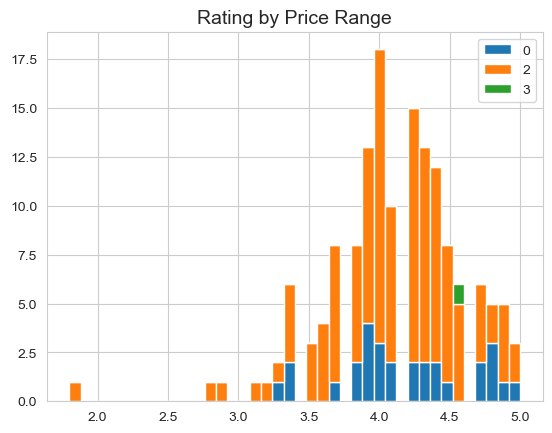

In [8]:
#distribution of ratings stacked by price range
fig, ax = plt.subplots()

ax.hist([wp[wp.range == p].rating for p in wp.range.unique()], bins = 40, stacked = True, label = wp.range.unique())

ax.legend()
ax.set_title('Rating by Price Range', fontsize = 14)
plt.show()

The stark difference in histogram distributions inclines us to deal with price levels 0 and 2 separately. As well, since there are so few price level 0 restaurants, we shall probably just take the best model we can initially find and not subdivide any further here.

In [9]:
wp = wp[wp.range == '0']

In [10]:
wp

,name,site,subtypes,category,type,phone,full_address,borough,street,postal_code,...,% White,% Black,% Asian,% Hispanic/Latino,Foreign Born Immigrant %,Median Age,Neighborhood Turnover %,state,county,tract
6,TJ's Pizza,False,Pizza restaurant,restaurants,Pizza restaurant,True,"5212 W Girard Ave, Philadelphia, PA 19131",West Philadelphia,5212 W Girard Ave,19131.0,...,0.012695,0.977512,0.000000,0.012695,0.039898,32.9,0.000000,42,101,10300
13,White Horse Tavern,False,Bar & grill,restaurants,Bar & grill,True,"4860 Lancaster Ave, Philadelphia, PA 19131",West Philadelphia,4860 Lancaster Ave,19131.0,...,0.033690,0.922434,0.000000,0.002612,0.069992,37.7,0.000000,42,101,11100
43,Black Dragon Takeout,True,"Restaurant, Chinese restaurant",restaurants,Restaurant,True,"5260 Rodman St, Philadelphia, PA 19143",West Philadelphia,5260 Rodman St,19143.0,...,0.231891,0.688752,0.010383,0.036836,0.052905,31.8,0.000000,42,101,8000
95,Grace House,False,Restaurant,restaurants,Restaurant,True,"555 N 63rd St, Philadelphia, PA 19151",West Philadelphia,555 N 63rd St,19151.0,...,0.006036,0.977454,0.000000,0.004261,0.131191,32.5,0.000000,42,101,10100
104,"Hyons Seafood ""West Philly""",False,Seafood restaurant,restaurants,Seafood restaurant,True,"5600 Spruce St, Philadelphia, PA 19139",West Philadelphia,5600 Spruce St,19139.0,...,0.015175,0.843713,0.035672,0.006898,0.022467,30.7,0.000000,42,101,8400
343,"ETTOOO,s Halal Food Truck",False,Takeout Restaurant,restaurants,Takeout Restaurant,True,"8 N 46th St, Philadelphia, PA 19139",West Philadelphia,8 N 46th St,19139.0,...,0.200344,0.597879,0.125537,0.045572,0.177701,28.7,0.016624,42,101,9200
363,Ron's Cafe Beer & Food,False,Restaurant,restaurants,Restaurant,True,"400 N 59th St, Philadelphia, PA 19151",West Philadelphia,400 N 59th St,19151.0,...,0.022410,0.977590,0.000000,0.000000,0.016298,32.9,0.000000,42,101,9500
443,Kim's Oriental Foods,False,Chinese restaurant,restaurants,Chinese restaurant,True,"Walnut St, Philadelphia, PA 19104",West Philadelphia,Walnut St,19104.0,...,0.470275,0.094732,0.249879,0.148864,0.183664,21.1,0.020300,42,101,8801
517,720 West Bistro,False,Restaurant,restaurants,Restaurant,True,"720 S 52nd St, Philadelphia, PA 19143",West Philadelphia,720 S 52nd St,19143.0,...,0.231891,0.688752,0.010383,0.036836,0.052905,31.8,0.000000,42,101,8000
576,No. 1 Chinese Restaurant,False,"Chinese restaurant, Restaurant",restaurants,Chinese restaurant,True,"5700 Media St, Philadelphia, PA 19131",West Philadelphia,5700 Media St,19131.0,...,0.031197,0.932330,0.000000,0.046407,0.016297,24.6,0.002639,42,101,11200


Our choice of features is guided by the low price level of these restaurants.

In [11]:
features = ['latitude', 'longitude', 'Poverty Rate %', 'Education Level %']

In [12]:
n_splits = 5
num_k = 20
kfold = KFold(n_splits, random_state = 5501, shuffle= True)

rmses = np.zeros((num_k, n_splits))

for k in range(num_k):
    i = 0
    for train, test in kfold.split(wp):
        wp_train = wp.iloc[train]
        wp_test = wp.iloc[test]
        knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsRegressor(k+1))])

        knn_pipe.fit(wp_train[features], wp_train.rating)
        preds = knn_pipe.predict(wp_test[features])

        rmses[k, i] = root_mean_squared_error(wp_test.rating, preds)
        i += 1
rmses = np.mean(rmses, axis = 1)
min_k = np.argmin(rmses)
print(f'The best RMSE value is {rmses[min_k]: .3f}, happening at k = {min_k + 1}.')
    

The best RMSE value is  0.396, happening at k = 5.


In [15]:
df.columns

Index(['name', 'site', 'subtypes', 'category', 'type', 'phone', 'full_address',
       'borough', 'street', 'postal_code', 'latitude', 'longitude', 'h3',
       'rating', 'reviews', 'reviews_link', 'reviews_per_score_1',
       'reviews_per_score_2', 'reviews_per_score_3', 'reviews_per_score_4',
       'reviews_per_score_5', 'photos_count', 'photo',
       'working_hours_old_format', 'other_hours', 'business_status', 'about',
       'range', 'description', 'booking_appointment_link', 'location_link',
       'location_reviews_link', 'place_id', 'google_id', 'cid', 'kgmid',
       'reviews_id', 'census_tract', 'Median Household Income',
       'Poverty Rate %', 'Education Level %', 'Total Population', '% White',
       '% Black', '% Asian', '% Hispanic/Latino', 'Foreign Born Immigrant %',
       'Median Age', 'Neighborhood Turnover %', 'state', 'county', 'tract'],
      dtype='object')

Let us try all geospatial, interactive, and census features, but ignore cuisine types.

In [13]:
rf_feats = ['latitude', 'longitude', 'photos_count', 'reviews'] + df.columns[-14:-3].tolist()

In [14]:
rf = RandomForestRegressor(max_depth = 5, random_state= 50492, max_features= len(rf_feats))

rmses = np.zeros(n_splits)

i=0
for train, test in kfold.split(wp):
    wp_train = wp.iloc[train]
    wp_test = wp.iloc[test]

    rf.fit(wp_train[rf_feats], wp_train.rating)
    preds = rf.predict(wp_test[rf_feats])

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)
print(f'The best RMSE value is {rmses: .3f}.')

score_df = pd.DataFrame({'feature': rf_feats,
                            'importance_score': rf.feature_importances_})
score_df.sort_values('importance_score', ascending = False, inplace = True)
score_df.head(10)

The best RMSE value is  0.362.


,feature,importance_score
12,Foreign Born Immigrant %,0.356121
1,longitude,0.151971
9,% Black,0.084583
0,latitude,0.072754
10,% Asian,0.054015
2,photos_count,0.053523
11,% Hispanic/Latino,0.044565
3,reviews,0.039528
13,Median Age,0.035583
4,Median Household Income,0.028119


This is the best model we have for price level 0 restaurants, so we will keep it. Now we move on to price level 2.

In [15]:
wp = df[df.borough == 'West Philadelphia']

In [16]:
wp = wp[(wp.range == '2') ]

In [18]:
rf = RandomForestRegressor(max_depth = 5, random_state= 50492, max_features= len(rf_feats))

rmses = np.zeros(n_splits)

i=0
for train, test in kfold.split(wp):
    wp_train = wp.iloc[train]
    wp_test = wp.iloc[test]

    rf.fit(wp_train[rf_feats], wp_train.rating)
    preds = rf.predict(wp_test[rf_feats])

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)
print(f'The best RMSE value is {rmses: .3f}.')

score_df = pd.DataFrame({'feature': rf_feats,
                            'importance_score': rf.feature_importances_})
score_df.sort_values('importance_score', ascending = False, inplace = True)
score_df.head(10)

The best RMSE value is  0.466.


,feature,importance_score
3,reviews,0.253240
12,Foreign Born Immigrant %,0.250301
1,longitude,0.087168
2,photos_count,0.087069
0,latitude,0.073901
6,Education Level %,0.054381
11,% Hispanic/Latino,0.051703
8,% White,0.032768
9,% Black,0.026444
10,% Asian,0.024786


The features deemed most significant are:

In [19]:
k_feats = ['reviews', 'Foreign Born Immigrant %', 'longitude', 'latitude', 'photos_count', 'Education Level %', '% Hispanic/Latino']

In [20]:
n_splits = 5
num_k = 20

rmses = np.zeros((num_k, n_splits))

for k in range(num_k):
    i = 0
    for train, test in kfold.split(wp):
        wp_train = wp.iloc[train]
        wp_test = wp.iloc[test]
        knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsRegressor(k+1))])

        knn_pipe.fit(wp_train[k_feats], wp_train.rating)
        preds = knn_pipe.predict(wp_test[k_feats])

        rmses[k, i] = root_mean_squared_error(wp_test.rating, preds)
        i += 1
rmses = np.mean(rmses, axis = 1)
min_k = np.argmin(rmses)
print(f'The best RMSE value is {rmses[min_k]: .3f}, happening at k = {min_k + 1}.')
    

The best RMSE value is  0.451, happening at k = 17.


In [21]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
rmses = np.zeros( n_splits)

i = 0
for train, test in kfold.split(wp):
    wp_train = wp.iloc[train]
    wp_test = wp.iloc[test]
  
    mlr.fit(wp_train[k_feats], wp_train.rating)
    preds = mlr.predict(wp_test[k_feats])

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)
min_k = np.argmin(rmses)
print(f'The RMSE value is {rmses: .3f}.')
    

The RMSE value is  0.479.


17-neighbors regression using 'k_feats' for the features is our best model for price level 2 restaurants in West Philly. We shall use this model to kickstart the manual clustering algorithm developed in the previous notebook. We shall henceforth refer to the algorithm as *deconstruction*.

## Deconstruction on West Philly level 2 restaurants

Let us now pursue deconstruction on the set of price level 2 restaurants in West Philly.

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from tree_helpers import SkNode, create_sk_nodes
from sklearn.metrics import precision_score, recall_score



For convenience, we wrote all functions and class definitions developed previously for deconstruction to a Python file 'cluster_fns'. There, we also wrote the entire algorithm as a class called 'DecCluster' which executes each step of the deconstruction algorithm in order and retains the necessary information.

In [23]:
from cluster_fns import get_errs, assign_class, LE_Class, get_subsets, def_cluster, deconstruct, good_rmse, bad_rmse, DecCluster

In [24]:
k_feats

['reviews',
 'Foreign Born Immigrant %',
 'longitude',
 'latitude',
 'photos_count',
 'Education Level %',
 '% Hispanic/Latino']

In [25]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsRegressor(17))])

dc = DecCluster(kfold)

dc.fit(wp, None, knn_pipe, k_feats, rf_feats, thresh = 0.6)


In [26]:
print("The deconstruction scheme on price level 2 restaurants modeled by 17-neighbors regression, the best model we have so far (with RMSE value 0.451) is:")
print(" ")
print(f'Precision score: {dc.prec}')
print(f"Recall score: {dc.recall}")
print("The table of feature importances is: ")
print(dc.feat_imp)
print(" ")
print(f"We recover improvement of the RMSE to {dc.good_rmse} on the good set, and the error worsens to {dc.bad_rmse} on the bad set.")
print(f"The size of the bad set is {len(dc.err_df)}.")

The deconstruction scheme on price level 2 restaurants modeled by 17-neighbors regression, the best model we have so far (with RMSE value 0.451) is:
 
Precision score: 0.6522
Recall score: 0.7895
The table of feature importances is: 
                    features  importance score
3                    reviews          0.451281
0                   latitude          0.172725
1                  longitude          0.157303
7           Total Population          0.126807
6          Education Level %          0.052109
2               photos_count          0.023980
12  Foreign Born Immigrant %          0.015796
4    Median Household Income          0.000000
5             Poverty Rate %          0.000000
8                    % White          0.000000
9                    % Black          0.000000
10                   % Asian          0.000000
11         % Hispanic/Latino          0.000000
13                Median Age          0.000000
14   Neighborhood Turnover %          0.000000
 
We recover i

In [27]:
bad = dc.err_df
bad

,name,site,subtypes,category,type,phone,full_address,borough,street,postal_code,...,% Asian,% Hispanic/Latino,Foreign Born Immigrant %,Median Age,Neighborhood Turnover %,state,county,tract,Errors,Class
134,Nephew’s Taqueria,True,Restaurant,restaurants,Restaurant,True,"7588 Haverford Ave, Philadelphia, PA 19151",West Philadelphia,7588 Haverford Ave,19151.0,...,0.016701,0.000000,0.137678,35.8,0.000000,42,101,9801,0.964706,1
168,Cholula Mexican Grill Inc,False,"Mexican restaurant, Takeout Restaurant, Mexica...",restaurants,Mexican restaurant,True,"134 N 52nd St, Philadelphia, PA 19139",West Philadelphia,134 N 52nd St,19139.0,...,0.038871,0.023206,0.092825,33.1,0.000000,42,101,9300,0.894118,1
338,Zenful Treats By Kings’s Kaf’e,False,Restaurant,restaurants,Restaurant,True,"54 S 60th St, Philadelphia, PA 19139",West Philadelphia,54 S 60th St,19139.0,...,0.000000,0.010963,0.033765,39.1,0.000000,42,101,8302,1.100000,1
361,Blue lagoon,False,Jamaican restaurant,restaurants,Jamaican restaurant,True,"7331Brookhaven rd, Philadelphia, PA 19151",West Philadelphia,7331Brookhaven rd,19151.0,...,0.016701,0.000000,0.137678,35.8,0.000000,42,101,9801,0.294118,0
482,Lee's Market,False,Restaurant,restaurants,Restaurant,True,"423 N 36th St, Philadelphia, PA 19104",West Philadelphia,423 N 36th St,19104.0,...,0.175177,0.077053,0.137804,19.9,0.024915,42,101,9000,0.694118,1
579,iBowl,True,Traditional restaurant,restaurants,Traditional restaurant,True,"3639 Lancaster Ave, Philadelphia, PA 19104",West Philadelphia,3639 Lancaster Ave,19104.0,...,0.280593,0.073423,0.300241,30.3,0.037573,42,101,9100,0.870588,1
917,Bar 50,False,Bar & grill,restaurants,Bar & grill,True,"1300 N 50th St #4505, Philadelphia, PA 19131",West Philadelphia,1300 N 50th St #4505,19131.0,...,0.000000,0.002612,0.069992,37.7,0.000000,42,101,11100,0.235294,0
1270,Carters Pizza and Beer,True,"Restaurant, Beer store, Breakfast restaurant, ...",restaurants,Restaurant,True,"3816 Chestnut St Unit 1, Philadelphia, PA 19104",West Philadelphia,3816 Chestnut St Unit 1,19104.0,...,0.249879,0.148864,0.183664,21.1,0.020300,42,101,8801,0.800000,1
573,Rainbow Seafoods,False,Seafood restaurant,restaurants,Seafood restaurant,True,"7562 Haverford Ave, Philadelphia, PA 19151",West Philadelphia,7562 Haverford Ave,19151.0,...,0.016701,0.000000,0.137678,35.8,0.000000,42,101,9801,0.011765,0
637,Stacy's Pizza,True,"Pizza restaurant, Fast food restaurant, Greek ...",restaurants,Pizza restaurant,True,"7586 Haverford Ave, Philadelphia, PA 19151",West Philadelphia,7586 Haverford Ave,19151.0,...,0.016701,0.000000,0.137678,35.8,0.000000,42,101,9801,0.652941,1


We test various new models on the "bad" set.

In [28]:
feats = ['reviews', 'latitude', 'longitude', 'Total Population', 'Education Level %']

In [29]:
n_splits = 5
num_k = 18

rmses = np.zeros((num_k, n_splits))

for k in range(num_k):
    i = 0
    for train, test in kfold.split(bad):
        wp_train = bad.iloc[train]
        wp_test = bad.iloc[test]
        knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsRegressor(k+1))])

        knn_pipe.fit(wp_train[feats], wp_train.rating)
        preds = knn_pipe.predict(wp_test[feats])

        rmses[k, i] = root_mean_squared_error(wp_test.rating, preds)
        i += 1
rmses = np.mean(rmses, axis = 1)
min_k = np.argmin(rmses)
print(f'The best RMSE value is {rmses[min_k]: .3f}, happening at k = {min_k + 1}.')
    

The best RMSE value is  0.822, happening at k = 18.


In [30]:
rf_b = RandomForestRegressor(max_depth = 5, random_state= 50492, max_features= len(feats))

rmses = np.zeros(n_splits)

i=0
for train, test in kfold.split(bad):
    wp_train = bad.iloc[train]
    wp_test = bad.iloc[test]

    rf_b.fit(wp_train[feats], wp_train.rating)
    preds = rf_b.predict(wp_test[feats])

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)
print(f'The RMSE value is {rmses: .3f}.')

score_df = pd.DataFrame({'feature': feats,
                           'importance_score': rf_b.feature_importances_})
score_df.sort_values('importance_score', ascending = False, inplace = True)
score_df.head(10)

The RMSE value is  0.768.


,feature,importance_score
2,longitude,0.455927
0,reviews,0.364465
1,latitude,0.081952
3,Total Population,0.049629
4,Education Level %,0.048028


Recall 'rf_feats', and let us apply feature selection to it to see whether we can find better model(s).

In [31]:
rf_feats

['latitude',
 'longitude',
 'photos_count',
 'reviews',
 'Median Household Income',
 'Poverty Rate %',
 'Education Level %',
 'Total Population',
 '% White',
 '% Black',
 '% Asian',
 '% Hispanic/Latino',
 'Foreign Born Immigrant %',
 'Median Age',
 'Neighborhood Turnover %']

In [32]:
rf_b = RandomForestRegressor(max_depth = 5, random_state= 50492, max_features= len(feats))

rmses = np.zeros(n_splits)

i=0
for train, test in kfold.split(bad):
    wp_train = bad.iloc[train]
    wp_test = bad.iloc[test]

    rf_b.fit(wp_train[rf_feats], wp_train.rating)
    preds = rf_b.predict(wp_test[rf_feats])

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)
print(f'The RMSE value is {rmses: .3f}.')

score_df = pd.DataFrame({'feature': rf_feats,
                            'importance_score': rf_b.feature_importances_})
score_df.sort_values('importance_score', ascending = False, inplace = True)
score_df.head(10)

The RMSE value is  0.829.


,feature,importance_score
3,reviews,0.185986
1,longitude,0.172183
2,photos_count,0.142619
12,Foreign Born Immigrant %,0.081079
4,Median Household Income,0.076091
0,latitude,0.061234
5,Poverty Rate %,0.050173
13,Median Age,0.049453
9,% Black,0.043869
8,% White,0.034305


In [33]:
new_feat = feats[:3] + ['Median Household Income', 'photos_count', 'Foreign Born Immigrant %']

In [34]:



rmses = np.zeros( n_splits)

i = 0
for train, test in kfold.split(bad):
    wp_train = bad.iloc[train]
    wp_test = bad.iloc[test]
  
    mlr.fit(wp_train[new_feat], wp_train.rating)
    preds = mlr.predict(wp_test[new_feat])
    for j in range(len(preds)):
        value = preds[j]
        if value >= 5.0:
            preds[j] = 5.0

    rmses[i] = root_mean_squared_error(wp_test.rating, preds)
    i += 1
rmses = np.mean(rmses)

print(f'The RMSE value is {rmses: .3f}.')
    

The RMSE value is  0.563.


In [126]:
new_feat

['reviews',
 'Foreign Born Immigrant %',
 'longitude',
 'latitude',
 'photos_count',
 'Education Level %',
 '% Hispanic/Latino']

In [95]:
len(west_ph)

150

## Conclusion

In [35]:
df = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/train_data_with_census.csv")

In [36]:
wp_zer = df[(df.borough == 'West Philadelphia')& (df.range == '0')]

wp_one = df[(df.borough == 'West Philadelphia')& (df.range == '1')]

west_ph = df[df.borough == 'West Philadelphia']

err = np.sqrt(((0.563**2)*len(bad) + (0.328**2)*(len(wp) - len(bad)) + (0.362**2)*(len(wp_zer)) + (0.275**2)*(len(wp_one) - 36) + (0.57**2)*36)/len(west_ph))

print(f"Our methods have succeeded in reducing the CV avg RMSE for West Philly from ~0.48 to {np.round(err,3)}.")

Our methods have succeeded in reducing the CV avg RMSE for West Philly from ~0.48 to 0.384.


We have not considered the single level 3 restaurant in West Philly. Indeed, its inclusion was found in work not shown above to skew the results rather terribly. Upon looking into the identity of this one restaurant ('Pita Chip') on Google Maps, we found that its price range does not at all match level 3 and seems rather to fit into level 1. So we shall include this restaurant with level one for the future. I now wonder what other restaurants were mislabeled as '$$$' from the scraping that produced our dataset..

We write the definition of the cluster obtained to file.

In [37]:
cluster_df = pd.read_csv("../'Will It Restaurant?'/clusters.csv")

In [38]:
cluster_df

,origin,good_model,bad_model,class_features,0,1,2,3,4,5
0,"('West Philadelphia', '1')","('8-neighbors (gen.)', ['reviews', 'longitude'...","('Linear Regression', ['latitude', 'longitude'...","['latitude', 'longitude', 'photos_count', 'rev...","[[-inf, inf], [-inf, np.float64(-75.2185554504...","[[-inf, np.float64(39.95686149597168)], [np.fl...","[[-inf, np.float64(39.95686149597168)], [np.fl...","[[-inf, np.float64(39.95686149597168)], [np.fl...","[[np.float64(39.95686149597168), inf], [np.flo...","[[-inf, inf], [np.float64(-75.19183731079102),..."


In [39]:
subsets = dc.subsets

subsets = {str(key): value for key, value in subsets.items()}

addon_cluster = pd.DataFrame([{'origin': ('West Philadelphia', '2'), 'good_model': ('17-neighbors (bor.)', dc.mod_feats), 'bad_model': ('Linear Regression', new_feat), 'class_features': dc.class_feats} | subsets])

cluster_df = pd.concat([cluster_df, addon_cluster])

In [40]:
addon_cluster = pd.DataFrame([{'origin': ('West Philadelphia', '0'), 'good_model': ('Random Forest 5 (bor.)', rf_feats), 'bad_model': None, 'class_features': None } | {key: np.nan for key in cluster_df.columns[4:]}])

cluster_df = pd.concat([cluster_df, addon_cluster])

In [41]:
cluster_df.to_csv("../'Will It Restaurant?'/clusters.csv", index = False)